In [6]:
from mpl_toolkits.mplot3d import axes3d
import numpy as np # Numpy removed support for np.complex np.__version__ == 1.22.0 was used for this notebook
from pandas import read_table
import skrf as rf
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({'font.size': 5})
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.style'] = "italic"
%matplotlib inline


In [7]:
n100 = rf.Network("100N/s-param-high-density.s2p")
n120 = rf.Network("120N/s-param-high-density.s2p")
n140 = rf.Network("140N/s-param-high-density.s2p")
n160 = rf.Network("160N/s-param-high-density.s2p")
n180 = rf.Network("180N/s-param-high-density.s2p")
n200 = rf.Network("200N/s-param-high-density.s2p")

device_list = [n100, n120, n140, n160, n180, n200]

In [8]:
def Q_factor(trace, frequency):
    "Must be input in dB"
    maximum_value = np.max(trace)
    db3 = maximum_value-3.0
    f_0 = frequency[np.argmax(trace)]
    i=0
    while (trace[i] < db3):
        i += 1
    f_low = frequency[i]
    while (trace[i] > db3):
        i += 1
    f_high = frequency[i]
    Q = f_0/(f_high-f_low)
    return Q
    

In [19]:
Q_list = []
N = np.array([100, 120, 140, 160, 180, 200])
i =0
for device in device_list:
    Q_list.append(Q_factor(device.s_db[:, 0][:,1], device.f))
    i+=1

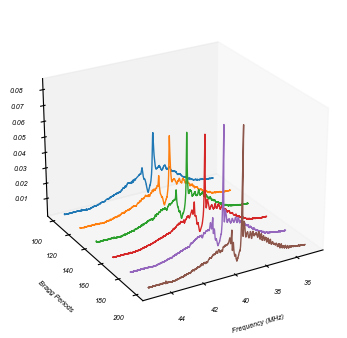

In [20]:
fig = plt.figure(figsize = (3.34,3.34))


ax = fig.add_subplot(111, projection =  '3d')
i=0

for device in device_list:
    ax.plot(device.f/1e6, 8001*[N[i]], device.s_mag[:, 0][:,1], linewidth=1)
    i+=1
plt.tight_layout()

ax.set_zlabel('Amplitude (mV)')
ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('Bragg Periods')
ax.view_init(25, 60)
ax.grid(False)
#ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
#ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

plt.savefig('3D frequecy response.png', dpi=500, bbox_inches='tight')

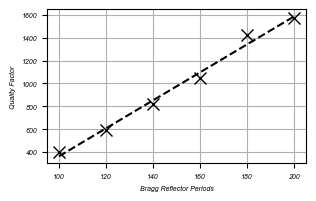

In [21]:
fig = plt.figure(figsize = (3.34,2))

ax = fig.add_subplot(111)

# the labels and titles
a = np.polyfit(N, Q_list, 1)
ax.plot(N, a[0]*N + a[1], 'k--')
ax.plot(N, Q_list, 'kx', markersize=9)
ax.grid('both')
ax.set_ylabel('Quality Factor')
ax.set_xlabel('Bragg Reflector Periods')

plt.savefig('quality_factor.png', dpi=500, bbox_inches='tight')

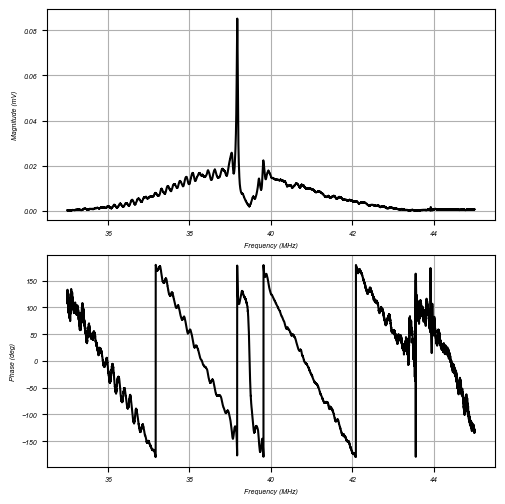

<Figure size 640x480 with 0 Axes>

In [22]:
fig, ax = plt.subplots(2,1,figsize=(5,5))

ax[0].plot(n200.f/1e6, n200.s_mag[:, 0][:,1],'k')
ax[0].grid('both')
ax[0].set_xlabel('Frequency (MHz)')
ax[0].set_ylabel('Magnitude (mV)')


ax[1].plot(n200.f/1e6, n200.s_deg[:, 0][:,1],'k')
ax[1].grid('both')
ax[1].set_xlabel('Frequency (MHz)')
ax[1].set_ylabel('Phase (deg)')


plt.tight_layout()
plt.show()

plt.savefig('basic_transmission.png', dpi=500)